![image.png](https://upload.wikimedia.org/wikipedia/en/thumb/e/e1/Eurovision_Song_Contest.svg/500px-Eurovision_Song_Contest.svg.png)

Eurovision logo since 2015 [Source](https://en.wikipedia.org/wiki/Eurovision_Song_Contest)

In [1]:
# Relative imports
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

# Exploratory data analysis of Eurovision Song Contest
## About Eurovision
"I remember spending four fun hours every year, watching Eurovision contest live, when I was a teenager."
The Eurovision Song Contest is an annual international music contest that hosts songwriters and singers from over 52 countries primarily European countries. This event is a live event and the residents of each country vote for the performances from the other countries to select the winner.
This festival have been held annually since 1956 (except 2020, of coarse!) and making it the longest-running annual international music competition [(Source)](https://eurovision.tv/). This event due to it's live nature, makes the hosting country as a hot tourism attraction and provide many opportunities. Based on [Wikipedia](https://en.wikipedia.org/wiki/Eurovision_Song_Contest), many of the top artists of the world have competed in the past years of this competition, including ABBA, Celine Dion, Julio Iglesias, Cliff Richard and Olivia Newton-John. Here is a picture my favorite singer while performing at Eurovision 2009.

![image.png](https://www.abc.net.au/reslib/200905/r372723_1730742.jpg)

**Image01: Alexander Rybak performing "Fairytale" the winner of 2009 Eurovision contest** [(Source)](https://www.escunited.com/forum/threads/norge-norway-2009-alexander-rybak-fairytale.3550/)

## About the Data
The data set used in this project is published by [TidyTuesday](https://www.tidytuesday.com/) on May 16, 2022. Based on the [data repository](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-17)'s description, [Tanya Shapiro](https://github.com/tashapiro/eurovision-contest/blob/main/code/eurovision_scraping.R#L97-L98) and [Bob Rudis](https://twitter.com/hrbrmstr/status/1526299494811422721?s=20&t=1ShDVK93h06QEmNZvGmK0Q) contributed to the cleaning and the scraping of the data. This dataset contains tow sub-datasets: 1. Eurovision data, 2. Country voting data which comes from [Data.World](https://data.world/datagraver/eurovision-song-contest-scores-1975-2019).
Throughout this project, we will focus on the Eurovision data.

### Data Dictionary
The data dictionary has been provided by [TidyTuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-17) which is presented below.

|**Variable**       |**class**     | **Description**                                          |
|:--------------|:---------| :--------- |
|event          |character | Event Name, e.g. Helsinki 2007                       |
|host_city      |character | Host city name, e.g. Helsinki                        |
|year           |integer   | Event year, e.g. 2007                                |
|host_country   |character | Host city country, e.g. Finland                      |
|event_url      |character | Link to event                                        |
|section        |character | Final, semi-final, first semi final, second-semi-final |
|artist         |character | Name of performer/participant                        |
|song           |character | Song title name                                      |
|artist_url     |character | Link to participant bio                              |
|image_url      |character | Link to participant image |
|artist_country |character | Participant country, e.g. Austria                    |
|country_emoji  |character | Emoji code for Country |
|running_order  |integer   | Running order for the teams |
|total_points   |integer   | Points                                               |
|rank           |integer   | Numeric rank, e.g. 2                                 |
|rank_ordinal   |character | Ordinal rank, e.g. 2nd                               |
|qualified      |logical   | Is the team qualified |
|winner         |logical   | Was this team the grand champion |

**Table 01: The data dictionary presenting a brief description on the datasets' structure** [(Source)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-17/readme.md)

### Data Describing and Record Counting
As this step we are interested to evaluate some metrics about the data, like count of the records and value's range for numeric columns.
#### Reading the Data
The script below reads the data and stores it in the `data/raw` folder.

In [2]:
raw_df = pd.read_csv("../data/raw/eurovision.csv", index_col=0)

#### Data Exploration
Using `info` and `describe` method to evaluate the data.

In [3]:
raw_df.head()

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
1,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,6.0,337.0,1.0,1st,True,False
2,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,S10,De Diepte,https://eurovision.tv/participant/s10-22,https://static.eurovision.tv/hb-cgi/images/963...,Netherlands,:flag_nl:,8.0,221.0,2.0,2nd,True,False
3,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Amanda Georgiadi Tenfjord,Die Together,https://eurovision.tv/participant/amanda-georg...,https://static.eurovision.tv/hb-cgi/images/963...,Greece,:flag_gr:,15.0,211.0,3.0,3rd,True,False
4,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,MARO,"Saudade, Saudade",https://eurovision.tv/participant/maro-22,https://static.eurovision.tv/hb-cgi/images/963...,Portugal,:flag_pt:,10.0,208.0,4.0,4th,True,False
5,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Intelligent Music Project,Intention,https://eurovision.tv/participant/intelligent-...,https://static.eurovision.tv/hb-cgi/images/963...,Bulgaria,:flag_bg:,7.0,29.0,16.0,16th,False,False


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 1 to 2005
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event           2005 non-null   object 
 1   host_city       2005 non-null   object 
 2   year            2005 non-null   int64  
 3   host_country    2005 non-null   object 
 4   event_url       2005 non-null   object 
 5   section         2005 non-null   object 
 6   artist          2005 non-null   object 
 7   song            2004 non-null   object 
 8   artist_url      2005 non-null   object 
 9   image_url       959 non-null    object 
 10  artist_country  2005 non-null   object 
 11  country_emoji   2005 non-null   object 
 12  running_order   2000 non-null   float64
 13  total_points    1913 non-null   float64
 14  rank            1964 non-null   float64
 15  rank_ordinal    1964 non-null   object 
 16  qualified       2005 non-null   bool   
 17  winner          2005 non-null   b

In [5]:
raw_df.describe()

,year,running_order,total_points,rank
count,2005.000000,2000.000000,1913.000000,1964.000000
mean,1999.012469,10.915000,81.525353,10.820265
std,18.376587,6.430432,81.968329,6.459780
min,1956.000000,1.000000,0.000000,1.000000
25%,1986.000000,5.750000,23.000000,5.000000
50%,2005.000000,10.500000,61.000000,10.000000
75%,2014.000000,16.000000,111.000000,16.000000
max,2022.000000,28.000000,758.000000,28.000000


The dataset presents 2005 records while some columns like `image_url`, `song`, `total_points`, `rank`, and `rank_ordinal` are showing some null values.
The numeric column ranges are also showing the range for the year of the recorded data and etc. Using `pandas-profiling` library helps to access a rough idea about the data, correlations, and distributions.
In order to avoid high HTMl load and rendering issues the Pandas Profiling codes have been commented below:

`profile = ProfileReport(raw_df)`

`profile`

However, two interesting charts from pandas profiling report has been provided below. Pearson's r, which is a measure of linear correlation between two variables.

![pearson_correlation_numerical_columns.png](eda_data/figures/pearson_correlation_numerical_columns.png)

**Figure 01: The Pearson's r correlation of Eurovision dataset for numirical values**


And the missing values dendogram, that allows us visualize the variable completion.

![missing_values_dendogram.png](eda_data/figures/missing_values_dendogram.png)

**Figure 02: The missing values dendogram of Eurovision dataset for numirical values**

#### Missing Values Exploration
One of the items reported in `pandas-profiling` report is the count of missing values. So we'll explore them on a sorted dataset based on the year. To see how recent the missing values have been reported.

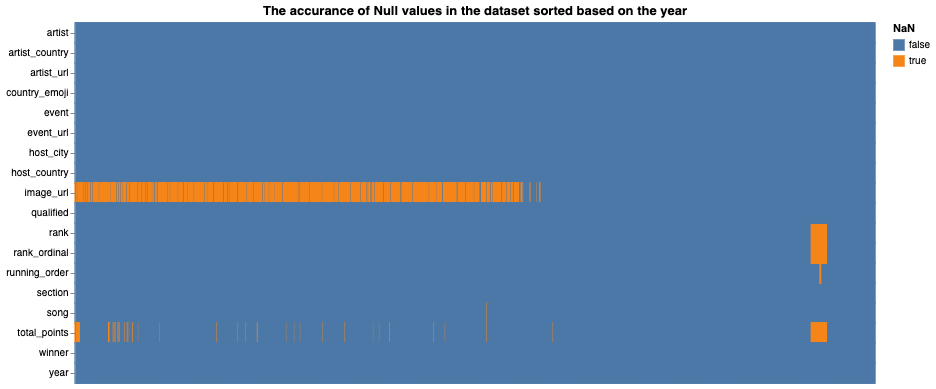

In [6]:
alt.Chart(
    raw_df.sort_values(
        'year',
        ignore_index=True
    ).isna().reset_index().melt(
        id_vars='index'
    )
).mark_rect().encode(
    alt.X('index:O', axis=None),
    alt.Y('variable', title=None),
    alt.Color('value', title='NaN'),
    alt.Stroke('value')
).properties(
    width=800,
    title="The accurance of Null values in the dataset sorted based on the year"
)

**Figure 03: The assurance of the null values in the dataset**

#### Correlation Exploration
There are four numeric columns in the data set, `year`, `running_order`, `total_points`, and `rank`. The pair-wise correlation of numeric values will be helpful to understand the probable correlations and trends.

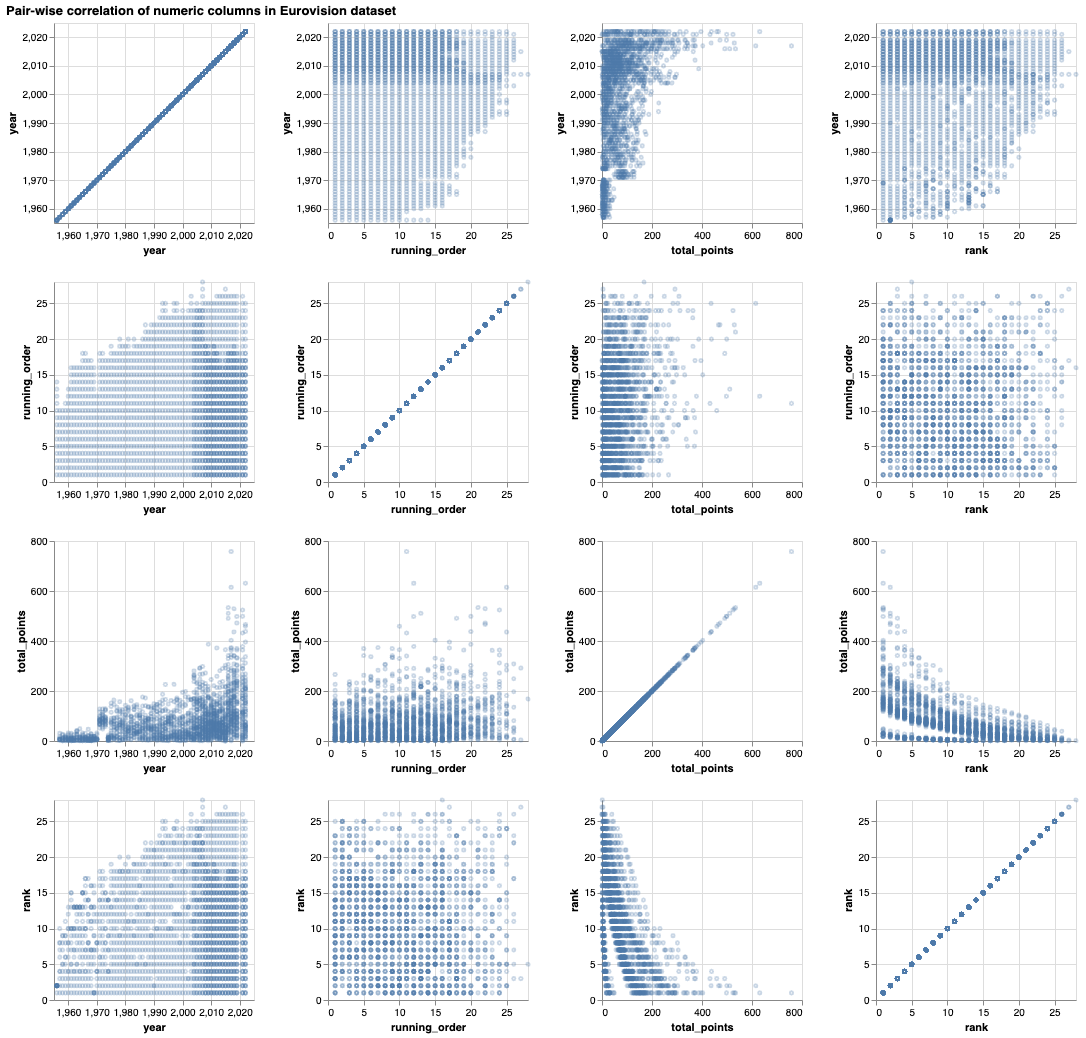

In [7]:
numeric_cols = raw_df.select_dtypes('number').columns.to_list()
alt.Chart(raw_df).mark_point(opacity=0.3, size=10).encode(
     alt.X(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False)),
     alt.Y(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False))
).properties(
    width=200,
    height=200
).repeat(
    row=numeric_cols,
    column=numeric_cols
).properties(
    title="Pair-wise correlation of numeric columns in Eurovision dataset"
)

**Figure 04: The pair-wise correlation of numeric columns in Eurovision dataset**

## References
- [TidyTuesday Data Repository](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-05-17)
- [Eurovision TV](https://eurovision.tv/)
- [WikiPedia](https://en.wikipedia.org/wiki/Eurovision_Song_Contest)